In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import fastf1 as ff
import fastf1.plotting as ffp

In [57]:
ff.Cache.enable_cache('./cache')

In [58]:
# load the race session
session = ff.get_session(2025, 'Bahrain', 'R')
session.load()

core           INFO 	Loading data for Bahrain Grand Prix - Race [v3.5.3]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
core        WARNING 	Driver 63: Lap timing integrity check failed for 3 lap(s)
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['81', '63', '4', '16', '44', '1', '10', '31', '22', '87', '12', '23', '6', '7', '14', '30', '18', '

    Now i'm gonna get all the laps details for the point finishers only

In [59]:
point_finishers = session.drivers[:10]
print(point_finishers)

['81', '63', '4', '16', '44', '1', '10', '31', '22', '87']


In [60]:
driver_laps = session.laps.pick_drivers(point_finishers).pick_quicklaps()
driver_laps = driver_laps.reset_index()

In [61]:
driver_laps.shape

(502, 32)

In [62]:
driver_laps.head()

,index,Time,Driver,DriverNumber,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,...,FreshTyre,Team,LapStartTime,LapStartDate,TrackStatus,Position,Deleted,DeletedReason,FastF1Generated,IsAccurate
0,0,0 days 00:57:13.827000,PIA,81,0 days 00:01:38.693000,1.0,1.0,NaT,NaT,NaT,...,False,McLaren,0 days 00:55:34.907000,2025-04-13 15:03:49.174,1,1.0,False,,False,False
1,1,0 days 00:58:51.319000,PIA,81,0 days 00:01:37.492000,2.0,1.0,NaT,NaT,0 days 00:00:31.139000,...,False,McLaren,0 days 00:57:13.827000,2025-04-13 15:05:28.094,1,1.0,False,,False,True
2,2,0 days 01:00:29.402000,PIA,81,0 days 00:01:38.083000,3.0,1.0,NaT,NaT,0 days 00:00:31.306000,...,False,McLaren,0 days 00:58:51.319000,2025-04-13 15:07:05.586,1,1.0,False,,False,True
3,3,0 days 01:02:07.535000,PIA,81,0 days 00:01:38.133000,4.0,1.0,NaT,NaT,0 days 00:00:31.326000,...,False,McLaren,0 days 01:00:29.402000,2025-04-13 15:08:43.669,1,1.0,False,,False,True
4,4,0 days 01:03:45.578000,PIA,81,0 days 00:01:38.043000,5.0,1.0,NaT,NaT,0 days 00:00:31.305000,...,False,McLaren,0 days 01:02:07.535000,2025-04-13 15:10:21.802,1,1.0,False,,False,True


In [63]:
finishing_order = [session.get_driver(i)['Abbreviation'] for i in point_finishers]
print(finishing_order)

['PIA', 'RUS', 'NOR', 'LEC', 'HAM', 'VER', 'GAS', 'OCO', 'TSU', 'BEA']


In [64]:
driver_laps.columns

Index(['index', 'Time', 'Driver', 'DriverNumber', 'LapTime', 'LapNumber',
       'Stint', 'PitOutTime', 'PitInTime', 'Sector1Time', 'Sector2Time',
       'Sector3Time', 'Sector1SessionTime', 'Sector2SessionTime',
       'Sector3SessionTime', 'SpeedI1', 'SpeedI2', 'SpeedFL', 'SpeedST',
       'IsPersonalBest', 'Compound', 'TyreLife', 'FreshTyre', 'Team',
       'LapStartTime', 'LapStartDate', 'TrackStatus', 'Position', 'Deleted',
       'DeletedReason', 'FastF1Generated', 'IsAccurate'],
      dtype='object')

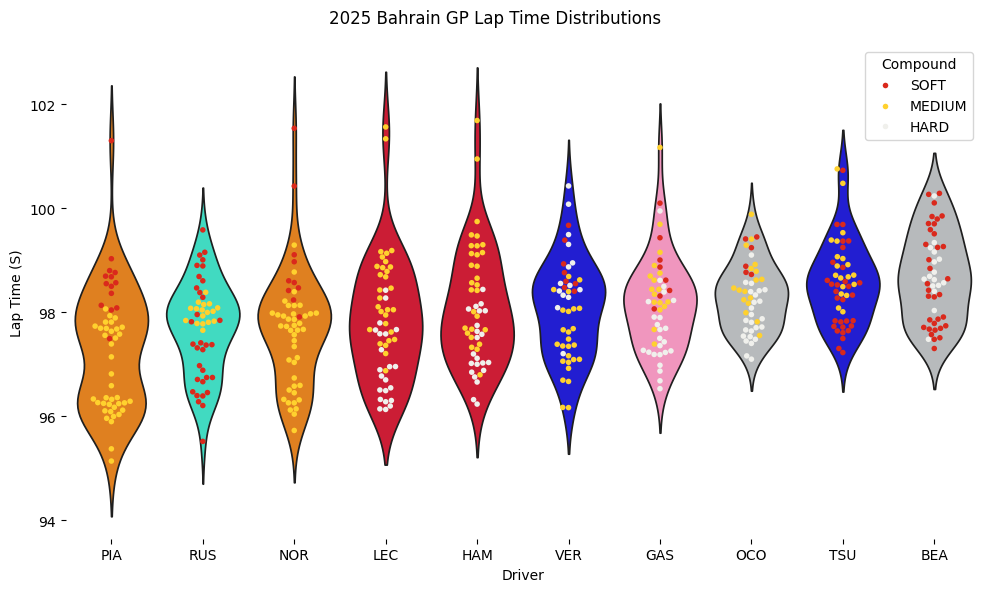

In [65]:
fig, ax = plt.subplots(figsize=(10, 6))

driver_laps["LapTime(s)"] = driver_laps["LapTime"].dt.total_seconds()

sns.violinplot(
    data=driver_laps,
    x="Driver",
    y="LapTime(s)",
    hue="Driver",
    density_norm="area",
    order=finishing_order,
    inner=None,
    palette=ffp.get_driver_color_mapping(session=session)
)

sns.swarmplot(
    data=driver_laps,
    x="Driver",
    y="LapTime(s)",
    order=finishing_order,
    hue="Compound",
    hue_order=["SOFT", "MEDIUM", "HARD"],
    linewidth=0,
    size=4,
    palette=ffp.get_compound_mapping(session=session)
)

ax.set_xlabel('Driver')
ax.set_ylabel('Lap Time (S)')
plt.suptitle('2025 Bahrain GP Lap Time Distributions')
sns.despine(left=True, bottom=True)

plt.tight_layout()
plt.show()

## Testing and exploring my Feature Set
     my target variable is LapTime(s) 

In [66]:
features_df = driver_laps[['LapNumber', 'Compound', 'TyreLife', 'LapTime(s)']].copy()
features_df.head()

,LapNumber,Compound,TyreLife,LapTime(s)
0,1.0,SOFT,4.0,98.693
1,2.0,SOFT,5.0,97.492
2,3.0,SOFT,6.0,98.083
3,4.0,SOFT,7.0,98.133
4,5.0,SOFT,8.0,98.043


In [67]:
features_df.shape

(502, 4)

In [68]:
features_df.info()

<class 'fastf1.core.Laps'>
RangeIndex: 502 entries, 0 to 501
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   LapNumber   502 non-null    float64
 1   Compound    502 non-null    object 
 2   TyreLife    502 non-null    float64
 3   LapTime(s)  502 non-null    float64
dtypes: float64(3), object(1)
memory usage: 15.8+ KB


In [69]:
# basic statistical summary
features_df.describe(include='all')

,LapNumber,Compound,TyreLife,LapTime(s)
count,502.000000,502,502.000000,502.000000
unique,NaN,3,NaN,NaN
top,NaN,MEDIUM,NaN,NaN
freq,NaN,235,NaN,NaN
mean,29.501992,NaN,12.424303,98.035199
std,16.954765,NaN,6.751155,1.056885
min,1.000000,NaN,1.000000,95.140000
25%,15.000000,NaN,7.000000,97.395000
50%,28.000000,NaN,12.000000,98.030500
75%,45.000000,NaN,17.000000,98.641250


In [70]:
features_df.isnull().sum()

LapNumber     0
Compound      0
TyreLife      0
LapTime(s)    0
dtype: int64

## Distribution Plots

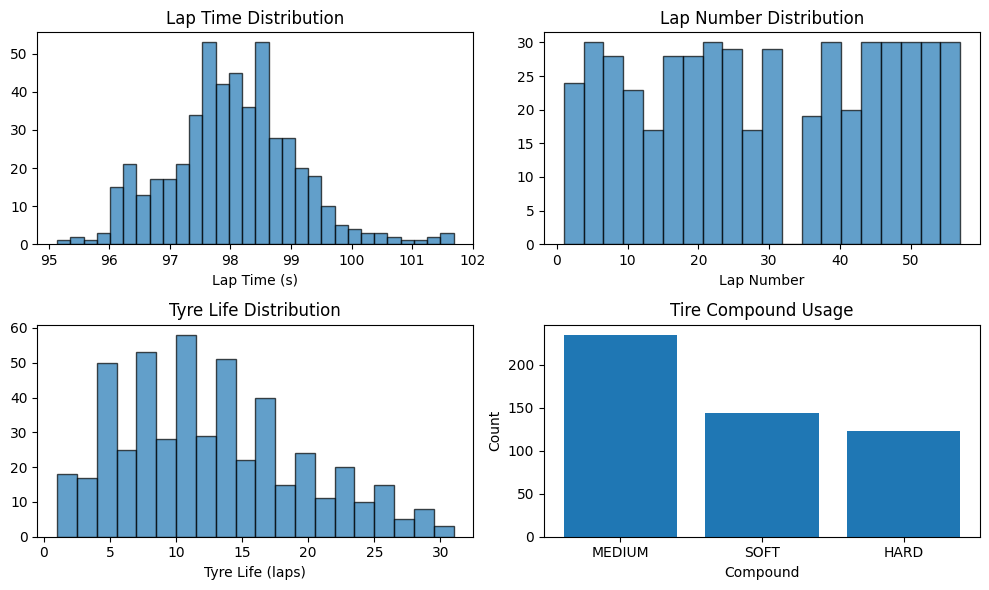

In [71]:
fig, axes = plt.subplots(2, 2, figsize=(10, 6))

# Lap Time Distribution
axes[0, 0].hist(features_df['LapTime(s)'], bins=30, edgecolor='black', alpha=0.7)
axes[0, 0].set_title('Lap Time Distribution')
axes[0, 0].set_xlabel('Lap Time (s)')

# Lap Number Distribution
axes[0, 1].hist(features_df['LapNumber'], bins=20, edgecolor='black', alpha=0.7)
axes[0, 1].set_title('Lap Number Distribution')
axes[0, 1].set_xlabel('Lap Number')

# Tyre Life Distribution
axes[1, 0].hist(features_df['TyreLife'], bins=20, edgecolor='black', alpha=0.7)
axes[1,0].set_title('Tyre Life Distribution')
axes[1,0].set_xlabel('Tyre Life (laps)')

# Compound distribution
compound_counts = features_df['Compound'].value_counts()
axes[1, 1].bar(compound_counts.index, compound_counts.values)
axes[1,1].set_title('Tire Compound Usage')
axes[1,1].set_xlabel('Compound')
axes[1, 1].set_ylabel('Count')

plt.tight_layout()
plt.show()

## Correlation Analysis

In [72]:
numeric_features = features_df.drop('Compound', axis=1)
correlation_matrix = numeric_features.corr()

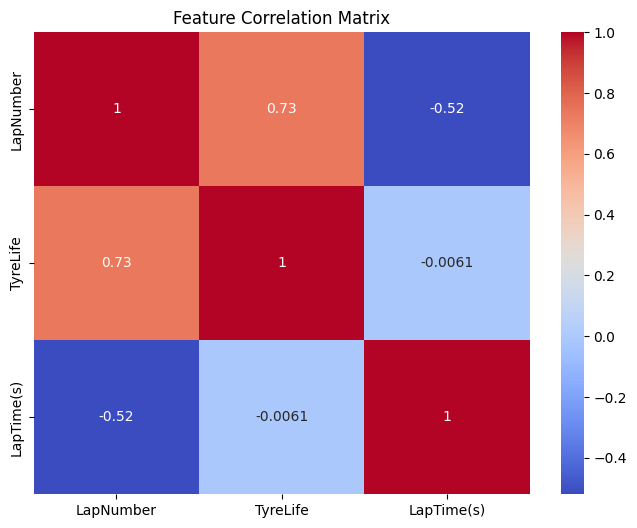

In [73]:
# plot correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Feature Correlation Matrix')
plt.show()

    we can see that LapNumber and TyreLife both have high correlation to each other

## Identifying Outliers using BoxPlots

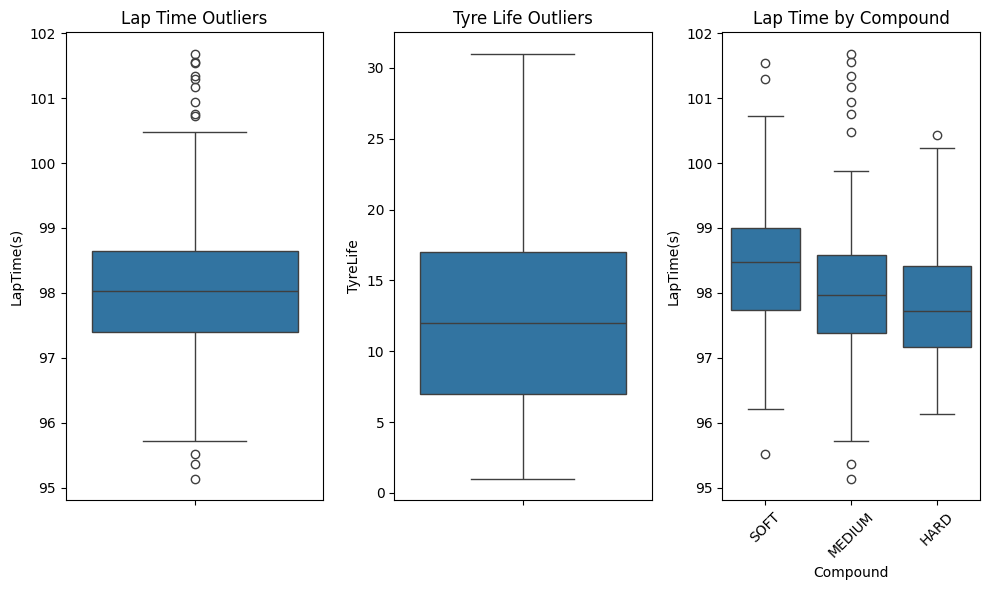

In [74]:
fix, axes = plt.subplots(1, 3, figsize=(10, 6))

sns.boxplot(y=features_df['LapTime(s)'], ax=axes[0])
axes[0].set_title('Lap Time Outliers')

sns.boxplot(y=features_df['TyreLife'], ax=axes[1])
axes[1].set_title('Tyre Life Outliers')

sns.boxplot(x=features_df['Compound'], y=features_df['LapTime(s)'], ax=axes[2])
axes[2].set_title('Lap Time by Compound')
axes[2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

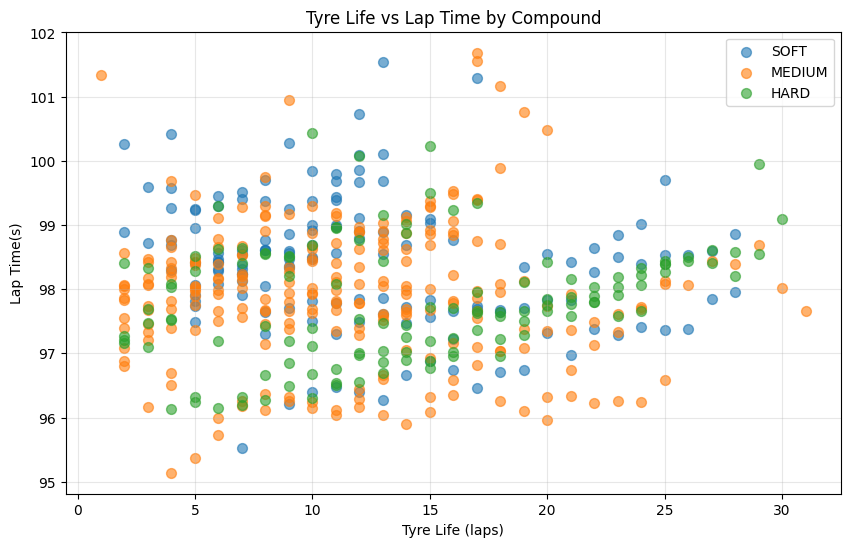

In [75]:
# Relationship between TyreLife and LapTime by Compound
plt.figure(figsize=(10, 6))

for compound in features_df['Compound'].unique():
    compound_data = features_df[features_df['Compound'] == compound]
    plt.scatter(compound_data['TyreLife'], compound_data['LapTime(s)'], label=compound, alpha=0.6, s=50)
    
plt.xlabel('Tyre Life (laps)')
plt.ylabel('Lap Time(s)')
plt.title('Tyre Life vs Lap Time by Compound')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

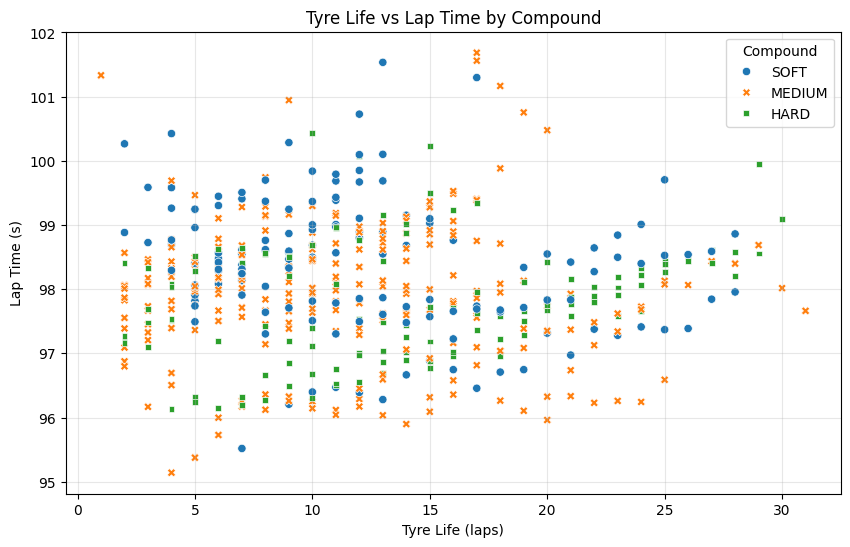

In [83]:
# found out there is a more easy way to plot with seaborn

plt.figure(figsize=(10, 6))
sns.scatterplot(data=features_df, x='TyreLife', y='LapTime(s)', hue='Compound', style='Compound')
plt.xlabel('Tyre Life (laps)')
plt.ylabel('Lap Time (s)')
plt.title('Tyre Life vs Lap Time by Compound')
plt.grid(True, alpha=0.3)
plt.show()

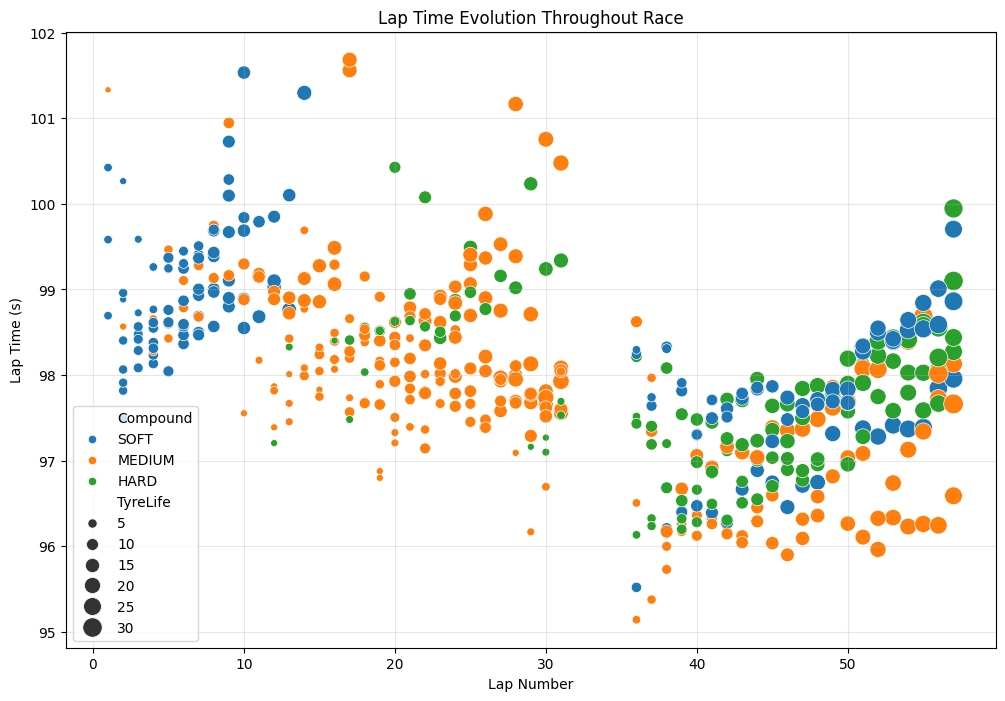

In [81]:
# Lap Time Evolution throughout the race
plt.figure(figsize=(12, 8))
sns.scatterplot(data=features_df, x='LapNumber', y='LapTime(s)', hue='Compound', size='TyreLife', sizes=(20, 200))
plt.title('Lap Time Evolution Throughout Race')
plt.xlabel('Lap Number')
plt.ylabel('Lap Time (s)')
plt.grid(True, alpha=0.3)
plt.show()